In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
n_classes = 3

In [50]:
class_names = dataset.class_names
class_names[0]

'Potato___Early_blight'

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


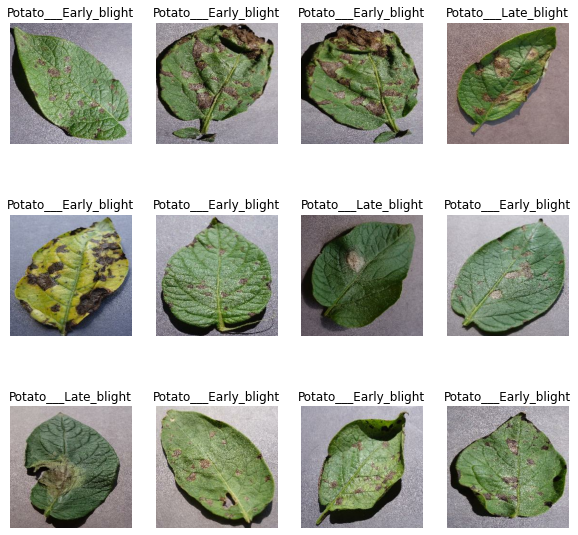

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [8]:
train_size = 0.8
# training set equals 54
# 80% training data, 10% validation data and 10% test data
train_Ds = dataset.take(54)

In [9]:
test_Ds = dataset.skip(54)

In [10]:
val_Ds = test_Ds.take(6)
# 6 is the 10% of the total length of the dataset.
test_Ds = test_Ds.skip(6)

In [11]:
def split_dataset(df,train_size = .8, validation_size = .1, test_size = .1, shuffle = True, shuffle_size = 10000):
    if shuffle:
        df = df.shuffle(shuffle_size, seed = 42)
    
    train_len = int(np.floor(len(df)*train_size))
    train_Ds = dataset.take(train_len)
    test_Ds = dataset.skip(train_len)
    val_len = int(np.floor(len(df)*validation_size))
    val_Ds = test_Ds.take(val_len)
    test_Ds = test_Ds.skip(val_len)
    
    return train_Ds, val_Ds, test_Ds

In [12]:
train_Ds, val_Ds, test_Ds = split_dataset(dataset)

In [13]:
print(len(train_Ds))
print(len(val_Ds))
print(len(test_Ds))

54
6
8


In [14]:
train_Ds = train_Ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_Ds = val_Ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_Ds = test_Ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

#Optimization for model training

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]);

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    
    
])

model.build(input_shape= input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [19]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_Ds,
    epochs = EPOCHS,
    batch_size= BATCH_SIZE,
    verbose= 1,
    validation_data= val_Ds
)

Epoch 1/10
54/54 [==============================] - 48s 826ms/step - loss: 0.8983 - accuracy: 0.4641 - val_loss: 0.8329 - val_accuracy: 0.4792
Epoch 2/10
54/54 [==============================] - 46s 846ms/step - loss: 0.6799 - accuracy: 0.6765 - val_loss: 0.4477 - val_accuracy: 0.8281
Epoch 3/10
54/54 [==============================] - 44s 813ms/step - loss: 0.3799 - accuracy: 0.8426 - val_loss: 0.2194 - val_accuracy: 0.9427
Epoch 4/10
54/54 [==============================] - 43s 793ms/step - loss: 0.2368 - accuracy: 0.9144 - val_loss: 0.1918 - val_accuracy: 0.9583
Epoch 5/10
54/54 [==============================] - 43s 790ms/step - loss: 0.1816 - accuracy: 0.9277 - val_loss: 0.1328 - val_accuracy: 0.9740
Epoch 6/10
54/54 [==============================] - 43s 793ms/step - loss: 0.2101 - accuracy: 0.9144 - val_loss: 0.1812 - val_accuracy: 0.9583
Epoch 7/10
54/54 [==============================] - 43s 795ms/step - loss: 0.0842 - accuracy: 0.9699 - val_loss: 0.1705 - val_accuracy: 0.9635

In [21]:
scores = model.evaluate(test_Ds)

8/8 [==============================] - 2s 154ms/step - loss: 0.0730 - accuracy: 0.9741


In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

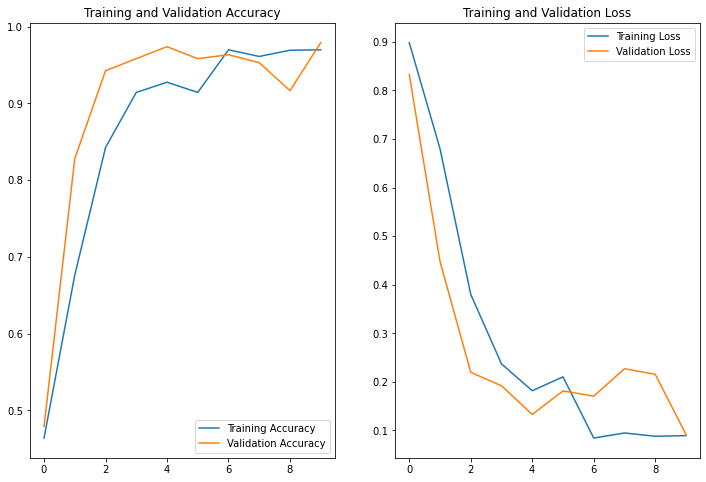

In [41]:
# plt.figure(figsize=(12,12))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,8));
ax1.plot(range(EPOCHS), acc, label = 'Training Accuracy',);
ax1.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy');
ax1.legend(loc = 'lower right');
ax1.set_title('Training and Validation Accuracy');


ax2.plot(range(EPOCHS), loss, label = 'Training Loss');
ax2.plot(range(EPOCHS), val_loss, label = 'Validation Loss');
ax2.legend(loc = 'upper right');
ax2.set_title('Training and Validation Loss');


In [42]:
len(test_Ds)

8

In [45]:
print(test_Ds.take(1))

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


first image to predict:
first image's actual label :Potato___Late_blight
first image's predicted label :Potato___Late_blight


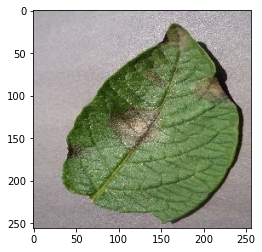

In [63]:
for images_batch, labels_batch in test_Ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0].numpy()
    print("first image to predict:")
    plt.imshow(first_image)
    print(f"first image's actual label :{class_names[first_label]}")
    
    predicted_batch_labels = model.predict(images_batch)
    predicted_first_label = class_names[(np.argmax(predicted_batch_labels[0]))]
    print(f"first image's predicted label :{predicted_first_label}")
    

In [77]:
def predict_image(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image = tf.expand_dims(img_array, 0)
    predictions = model.predict(image)
#     print(predictions[0])
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

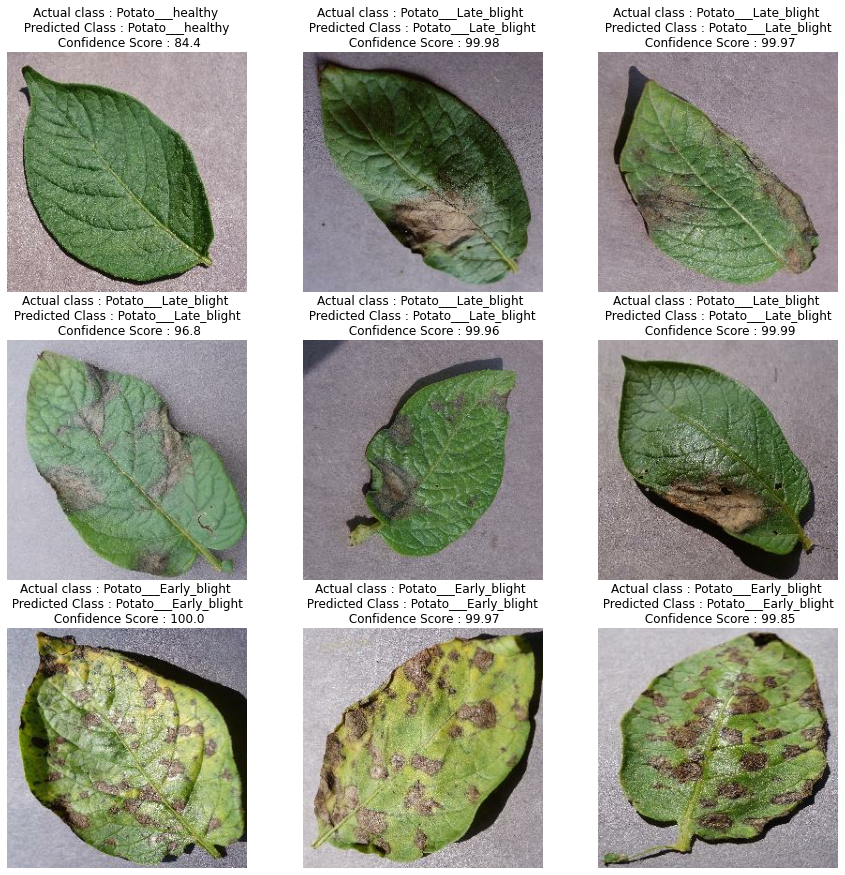

In [79]:
plt.figure(figsize= (15,15))

for images, labels in test_Ds.take(1):
    for i in range(9):
        predicted_class , confidence = predict_image(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(f"Actual class : {actual_class} \n Predicted Class : {predicted_class} \n Confidence Score : {confidence}")
        

In [88]:
import os
model_version = int((os.listdir("./models"))[-1])
model_version

2

In [89]:
model.save(f"./models/{model_version+1}")

INFO:tensorflow:Assets written to: ./models/3\assets
